In [1]:
import pandas as pd
import statsmodels.api as sm

# Load the AirPassengers dataset
data = sm.datasets.get_rdataset("AirPassengers", "datasets")
time_series = data.data
print(time_series.head())

          time  value
0  1949.000000    112
1  1949.083333    118
2  1949.166667    132
3  1949.250000    129
4  1949.333333    121


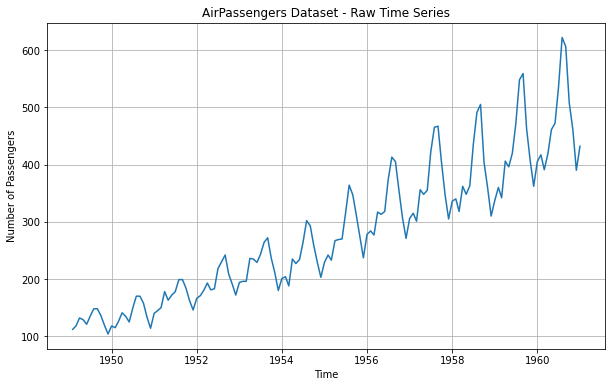

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the AirPassengers dataset from statsmodels
data = sm.datasets.get_rdataset("AirPassengers", "datasets")
time_series = data.data['value']

# Set up the time index for proper plotting
time_series.index = pd.date_range(start='1949-01-01', periods=len(time_series), freq='M')

# Plot the raw time series data
plt.figure(figsize=(10,6))
plt.plot(time_series)
plt.title('AirPassengers Dataset - Raw Time Series')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


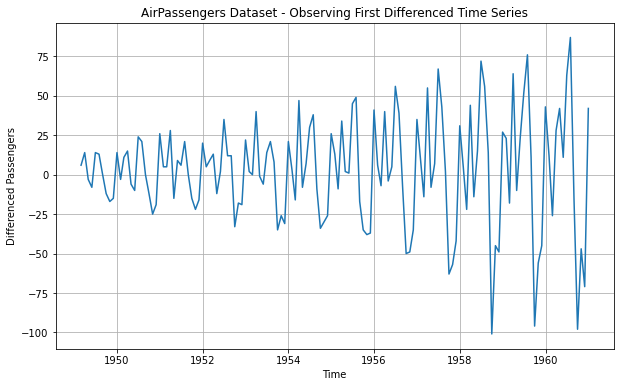

In [5]:
# Obtain first differences of the time series
diff_series = time_series.diff().dropna()

# Plotting the differenced time series
plt.figure(figsize=(10,6))
plt.plot(diff_series)
plt.title('AirPassengers Dataset - Observing First Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Passengers')
plt.grid(True)
plt.show()


C:\Users\Pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


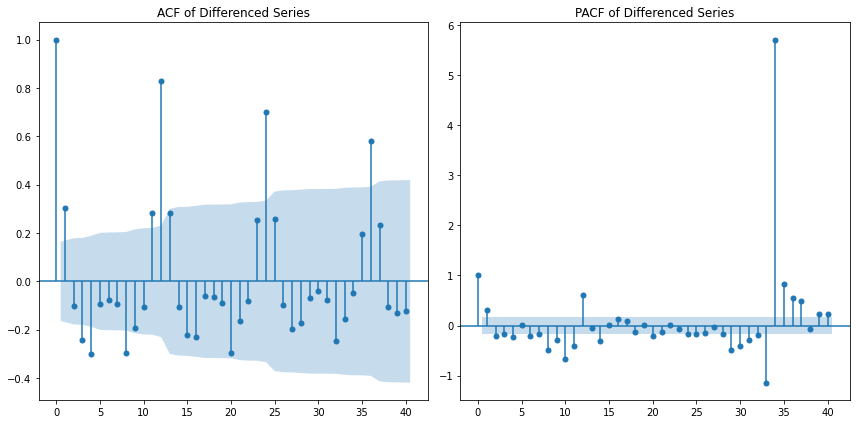

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ploting ACF and PACF for the differenced time series
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(diff_series, lags=40, ax=plt.gca())
plt.title('ACF of Differenced Series')

plt.subplot(122)
plot_pacf(diff_series, lags=40, ax=plt.gca())
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the raw time series
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060569
p-value: 0.9918802434376411


ADF Statistic after differencing: -2.8292668241699928
p-value after differencing: 0.05421329028382636


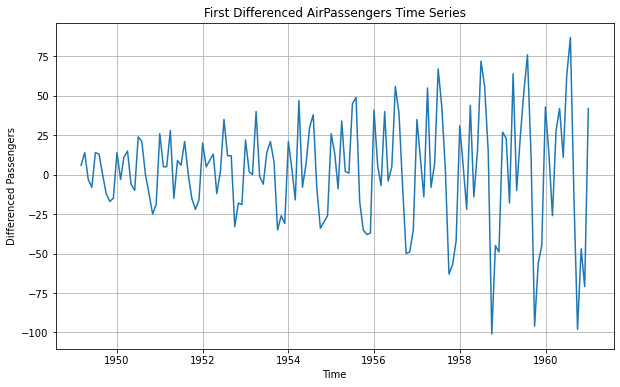

In [8]:
# Take first differences
diff_series = time_series.diff().dropna()

# Perform ADF test again on the differenced series
result_diff = adfuller(diff_series)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

# Plot the differenced series
plt.figure(figsize=(10,6))
plt.plot(diff_series)
plt.title('First Differenced AirPassengers Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Passengers')
plt.grid(True)
plt.show()

ADF Statistic after seasonal differencing: -3.383020726492481
p-value after seasonal differencing: 0.011551493085514952


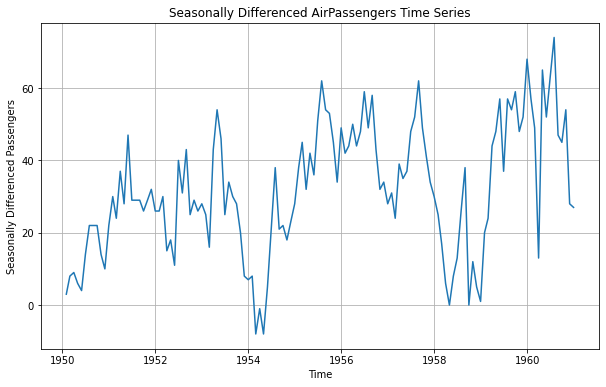

In [9]:
# Seasonal differencing
seasonal_diff_series = time_series.diff(12).dropna()

# Perform ADF test on seasonal differenced series
result_seasonal_diff = adfuller(seasonal_diff_series)
print('ADF Statistic after seasonal differencing:', result_seasonal_diff[0])
print('p-value after seasonal differencing:', result_seasonal_diff[1])

# Plot the seasonally differenced series
plt.figure(figsize=(10,6))
plt.plot(seasonal_diff_series)
plt.title('Seasonally Differenced AirPassengers Time Series')
plt.xlabel('Time')
plt.ylabel('Seasonally Differenced Passengers')
plt.grid(True)
plt.show()

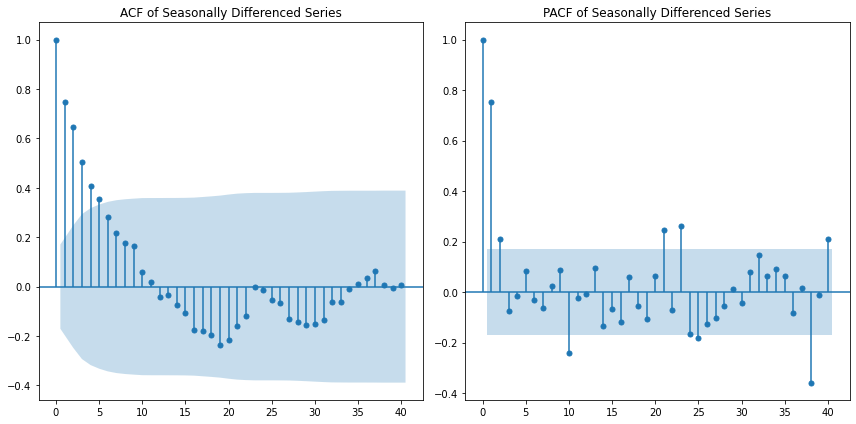

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the seasonally differenced time series
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(seasonal_diff_series, lags=40, ax=plt.gca())
plt.title('ACF of Seasonally Differenced Series')

plt.subplot(122)
plot_pacf(seasonal_diff_series, lags=40, ax=plt.gca())
plt.title('PACF of Seasonally Differenced Series')

plt.tight_layout()
plt.show()